# Grover's algorithm
Created by Elisa Bäumer, modified by Junye Huang

In [1]:
import numpy as np
from qiskit import IBMQ, QuantumCircuit, Aer, execute
from qiskit.quantum_info import Operator
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()

/Users/junye/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q-internal', group='deployed', project='default')>

In [2]:
def phase_oracle(n, indices_to_mark, name = 'Oracle'):
    qc = QuantumCircuit(n, name=name)
    oracle_matrix = np.identity(2**n)
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark] = -1
    qc.unitary(Operator(oracle_matrix), range(n))
    return qc

def diffuser(n, name = 'Diffuser'):
    qc = QuantumCircuit(n, name=name)
    qc.h(range(n))
    qc.append(phase_oracle(n,[0]),range(n))
    qc.h(range(n))
    return qc

def Grover(n, marked):
    qc = QuantumCircuit(n, n)
    r = int(np.round(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2))
    print(f'{n} qubits, basis state {marked} marked, {r} rounds')
    qc.h(range(n))
    for _ in range(r):
        qc.append(phase_oracle(n,marked), range(n))
        qc.append(diffuser(n), range(n))
    qc.measure(range(n), range(n))
    return qc

4 qubits, basis state [5] marked, 3 rounds


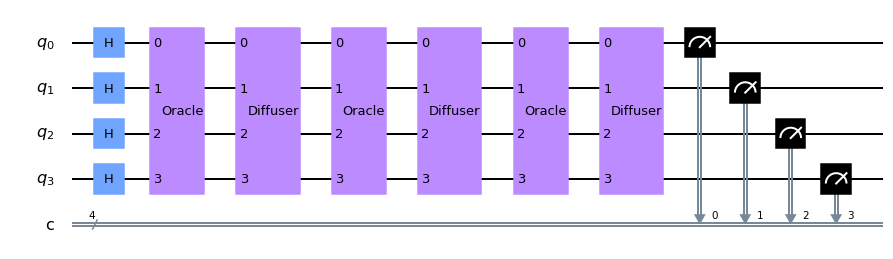

In [3]:
# Single marked element
n = 4
x = np.random.randint(2**n)
marked = [x]
qc = Grover(n, marked)

qc.draw('mpl')

{'0000': 3, '0001': 1, '0010': 2, '0011': 3, '0100': 4, '0101': 978, '0110': 4, '0111': 6, '1000': 1, '1001': 5, '1010': 3, '1011': 1, '1100': 2, '1101': 4, '1110': 2, '1111': 5}
2.6082688394304085


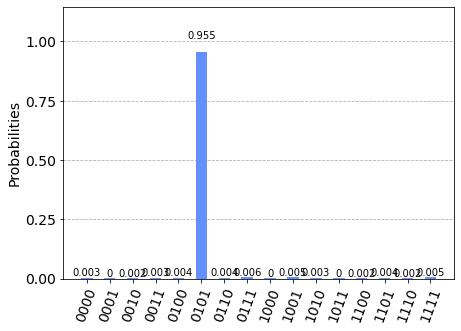

In [4]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts = result.get_counts(qc)
print(counts)
print(np.pi/(4*np.arcsin(np.sqrt(len(marked)/2**n)))-1/2)
plot_histogram(counts)

In [5]:
# Two marked elements
n = 3
x = np.random.randint(2**n)
y = np.random.randint(2**n)
while y==x:
    y = np.random.randint(2**n)
marked = [x,y]
qc = Grover(n, marked)

3 qubits, basis state [1, 6] marked, 1 rounds


In [6]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits == 5 and
                                   not x.configuration().simulator and x.status().operational==True))
#backend = provider.get_backend('ibmq_athens')
print("least busy backend: ", backend)
%qiskit_job_watcher

least busy backend:  ibmq_athens


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [7]:
shots = 8096
job = execute(qc, backend=backend, shots=shots, optimization_level=3)

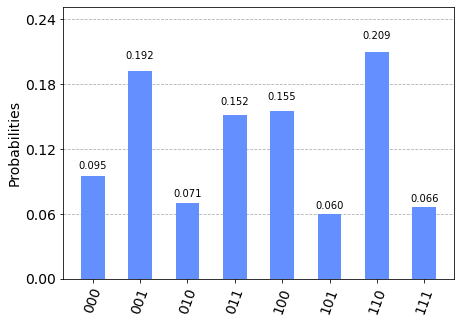

In [8]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

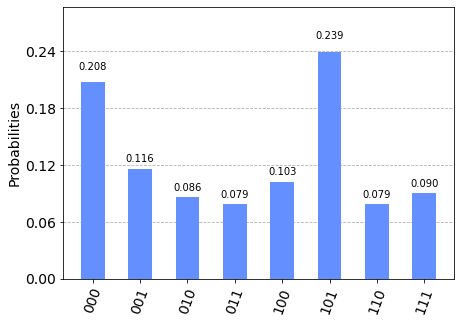

In [9]:
# job I ran before
ibmq_athens = provider.get_backend('ibmq_athens')
ibmq_rome = provider.get_backend('ibmq_rome')
#old_job = ibmq_rome.retrieve_job('5ea782c647880c0012aaa516') # marked |010>
old_job = ibmq_athens.retrieve_job('5f64289769951b0012eac8bb') # marked |000> and |101>
results = old_job.result()
answer = results.get_counts()
plot_histogram(answer)